In [14]:
import pandas as pd
import numpy as np
import math
import xlrd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Rectangle

In [2]:
# Define a function to create pie charts at any given (x,y) location
def draw_pie(ax,ratios=[0.4,0.3,0.3], 
             colors=['red','blue','orange'],
             X=0, Y=0, size = 1000, alpha=1):
    N = len(ratios)
    xy = []
    start = 0.0
    for ratio in ratios:
        x = [0] + np.cos(np.linspace(2*math.pi*start,2*math.pi*(start+ratio), 30)).tolist()
        y = [0] + np.sin(np.linspace(2*math.pi*start,2*math.pi*(start+ratio), 30)).tolist()
        xy1 = list(zip(x,y))
        xy.append(xy1)
        start += ratio
    for i, xyi in enumerate(xy):
        ax.scatter([X],[Y] , marker=(xyi,0), s=size, facecolor=colors[i], alpha=alpha )

In [3]:
# data provided by Sequitur about the landing zone etc. 
welldata = pd.read_csv('../files/Texon PDP  UNDEV updated well list for Biota calibration.csv', dtype=str)

In [4]:
fpd = pd.read_csv('../files/fpd3.csv', index_col = 0, dtype=str)

In [5]:
surveillanceAPI = welldata.loc[welldata['Product (WellSpace, Profile, Surveillance, Bench)']=='Benchmarking PDP well & Phase 2 Surveillance well'].API.tolist()

In [6]:
surveillanceWells = fpd.loc[fpd.wellapi.isin(surveillanceAPI)].index.tolist()

In [7]:
surveillanceWells

['university.09c.1111wb',
 'university.09.2707wc',
 'university.09.2820wa',
 'university.09.2816wb',
 'university.09.2830wb',
 'university.09.2914wc',
 'university.09c.3603wb',
 'university.09c.1207wa',
 'university.09c.1201wb']

In [8]:
results = pd.read_csv('../shared/LOOA_formation_contributions_AllWells_CollectionDates_06242019.txt', sep='\t', index_col=0)

In [9]:
for txt, r in results.iterrows():
    results.loc[txt, 'collectiondate'] = txt[-10:]
    results.loc[txt, 'wellname'] = txt[:-11]

In [10]:
# color for WC_A, WC_B, WC_C, Unknown contribution respectively. This is an input for the draw_pie function
colors = ['red','blue','orange','grey']

In [11]:
# create a dictionory for color coding each well trajectory based on landing zone
color_dic = {'WC A': 'red',
            'WC B': 'blue',
            'WC C': 'orange'}

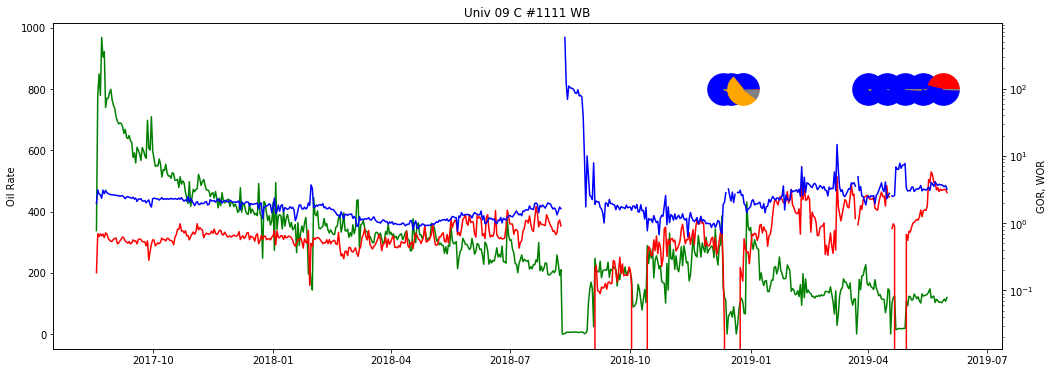

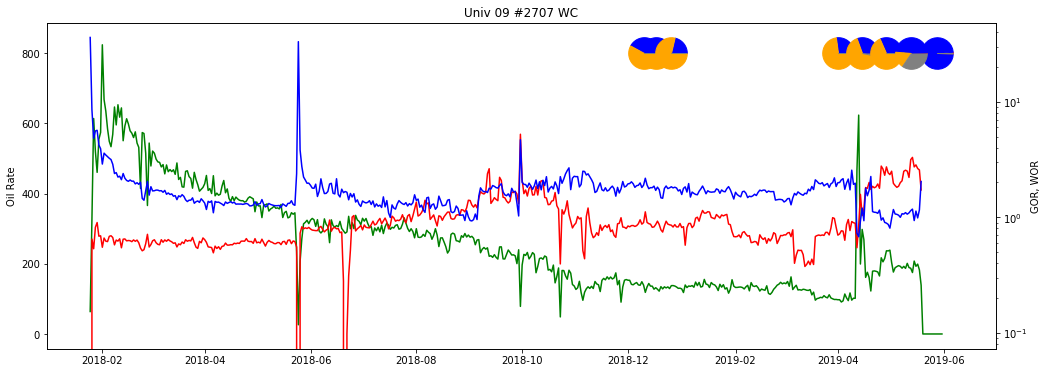

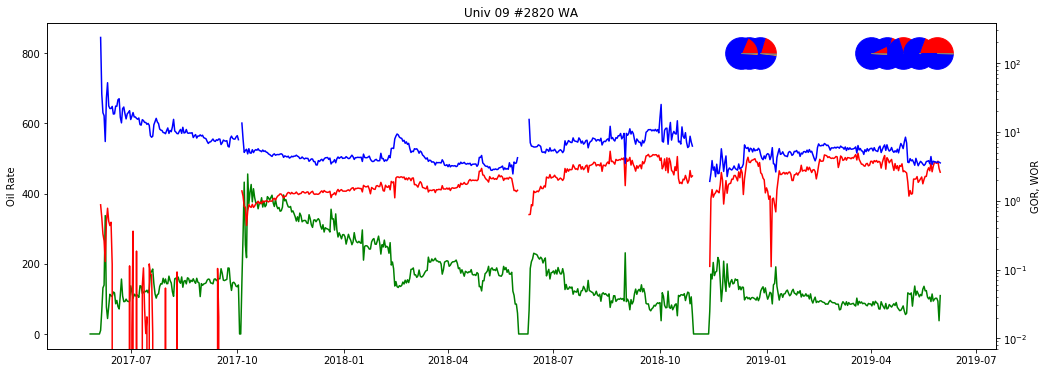

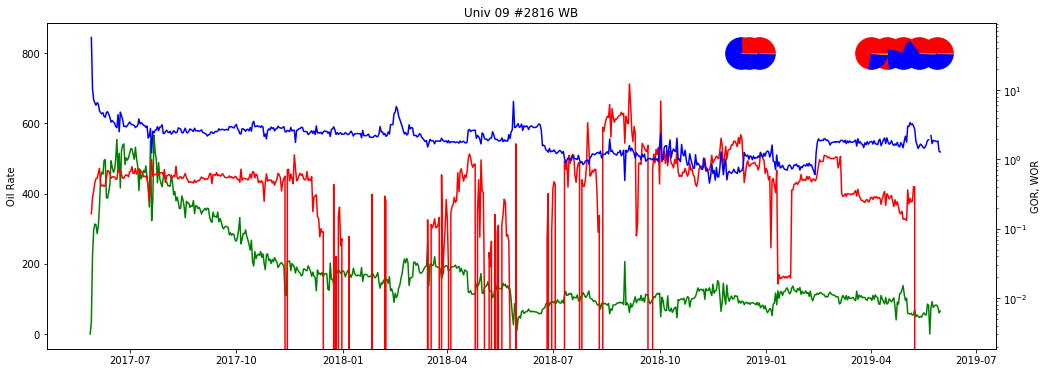

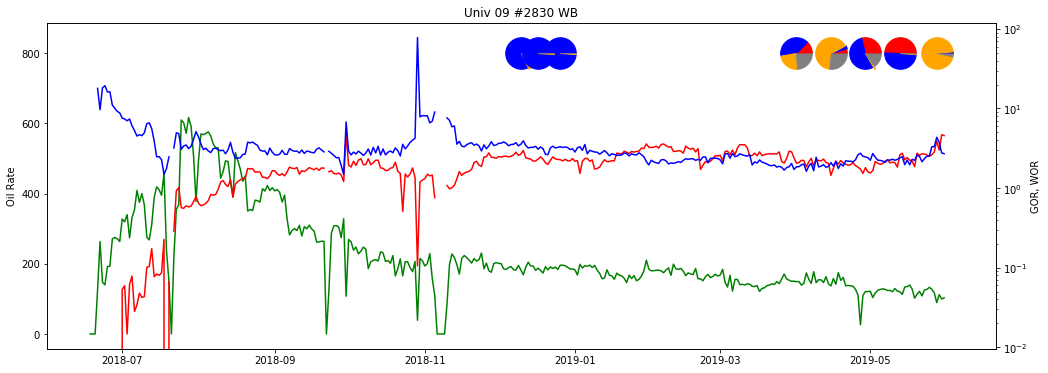

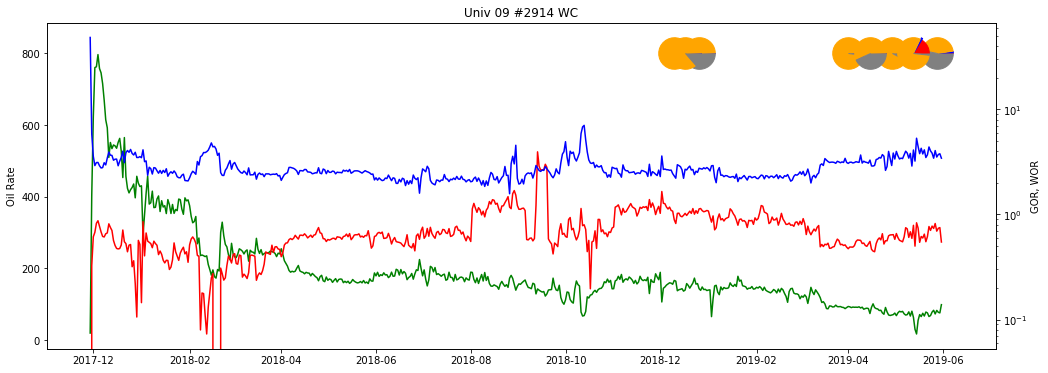

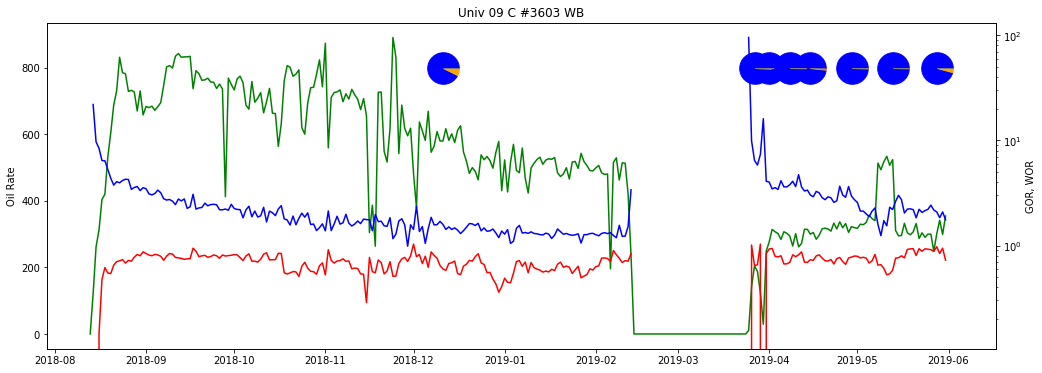

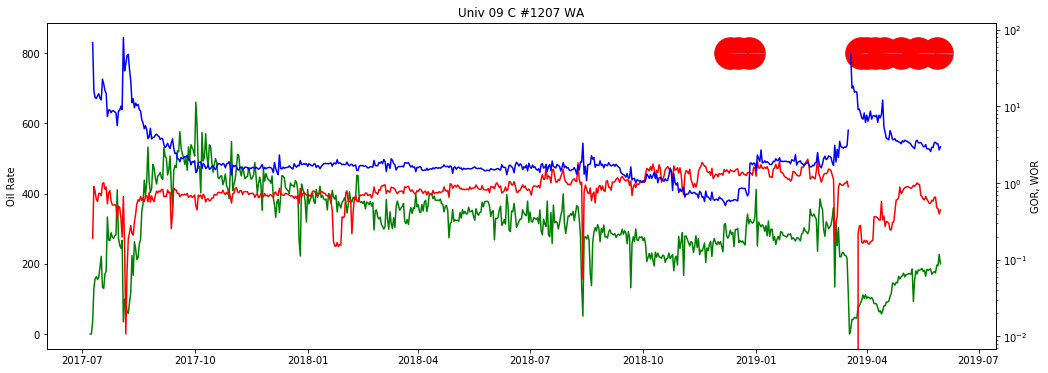

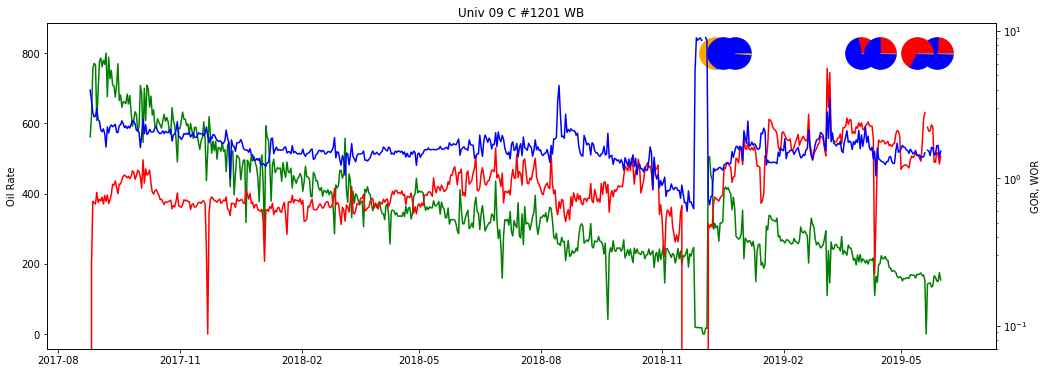

In [26]:
for well in surveillanceWells:
    new = well.replace('.',
                  ' ', 3).replace('university','Univ').replace('09a', '09 A').replace('09b', 
                  '09 B').replace('09c', '09 C').replace('wa', ' WA').replace('wb', ' WB').replace('wc', 
                  ' WC').replace('h', 'H').replace(' 1', ' #1').replace(' 2', ' #2').replace(' 3', ' #3')

    try:
        df = pd.read_excel('../files/BiotaStudy_DailyProd_FieldDirect_thru_2019-0531.xlsx', 
                   sheet_name=new, skiprows=6)
        df = df.iloc[:-4,:]

        df['Date'] =  pd.to_datetime(df['Date'], format='%Y%b%d')

        fig, ax = plt.subplots(1, figsize=(17,6))
        ax.plot(df.Date, df.Oil, c='green', label='Oil Rate')
#         ax.plot(df.Date, df['Tubing Pressure'], c='black', label='Tubing Pressure')
#         ax.plot(df.Date, df['Casing Pressure'], c='brown', label='Casing Pressure')
        ax.set_title(new)
        ax.set_ylabel('Oil Rate')
        #ax.set_ylim(0,1000)
        ax2 = ax.twinx()
        ax2.plot(df.Date, df['Gas']/df['Oil'], c='red', label='GOR')
        ax2.plot(df.Date, df['Water']/df['Oil'], c='blue', label='WOR')
        ax2.set_ylabel('GOR, WOR')
        ax2.set_yscale("log")

        #ax.set_xlim(pd.to_datetime('2018/12/01'), pd.to_datetime('2018/12/31'))
        for i, r in results.loc[results.wellname==well].iterrows():
            draw_pie(ax,[r['WC A'],r['WC B'],r['WC C'], r['Unknown']], 
                     colors,
                     pd.to_datetime(r.collectiondate), 800,size=1000, alpha=1)

        #ax.legend()
        ,
    except:
        continue
    


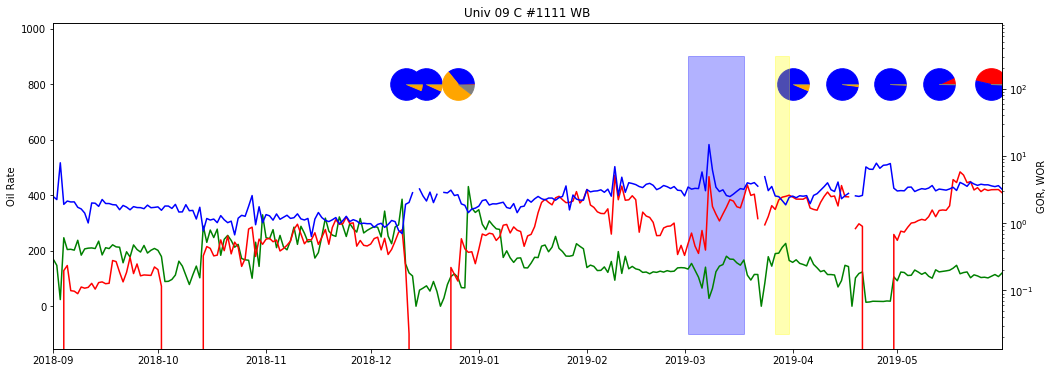

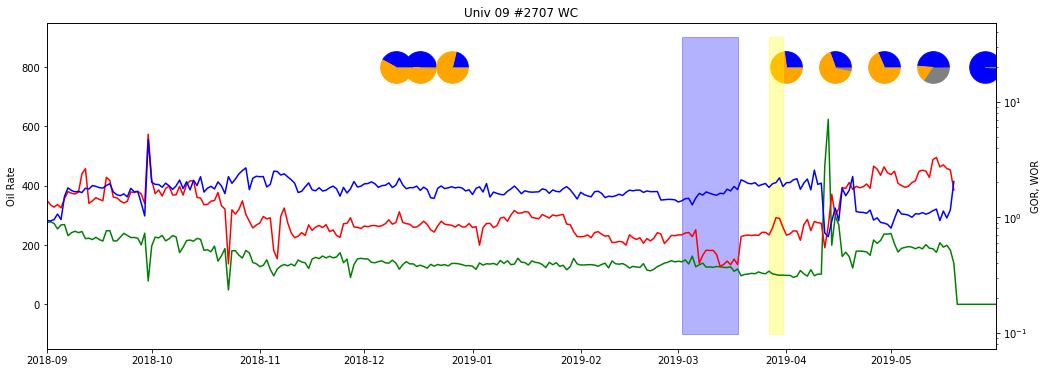

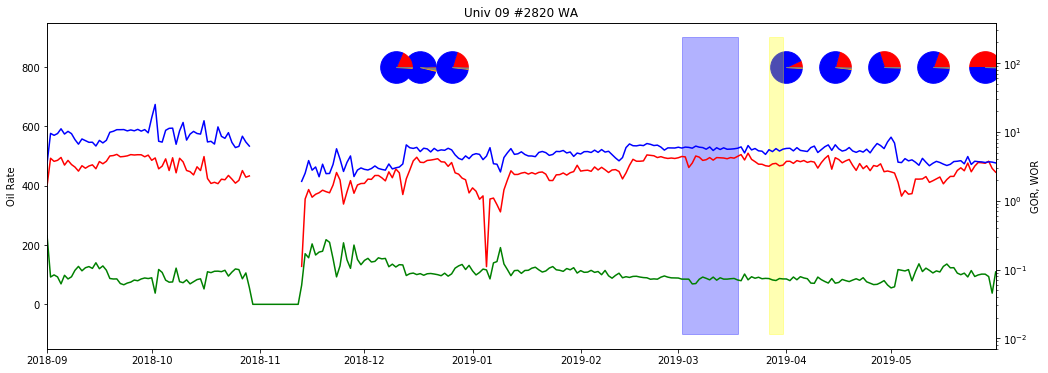

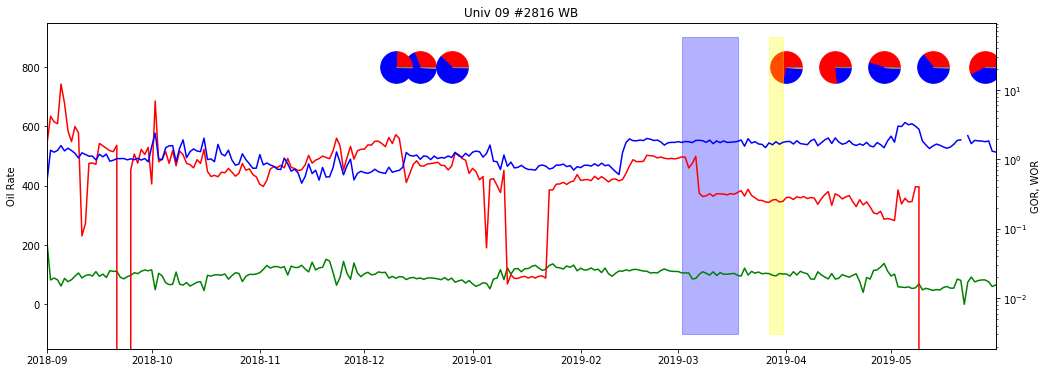

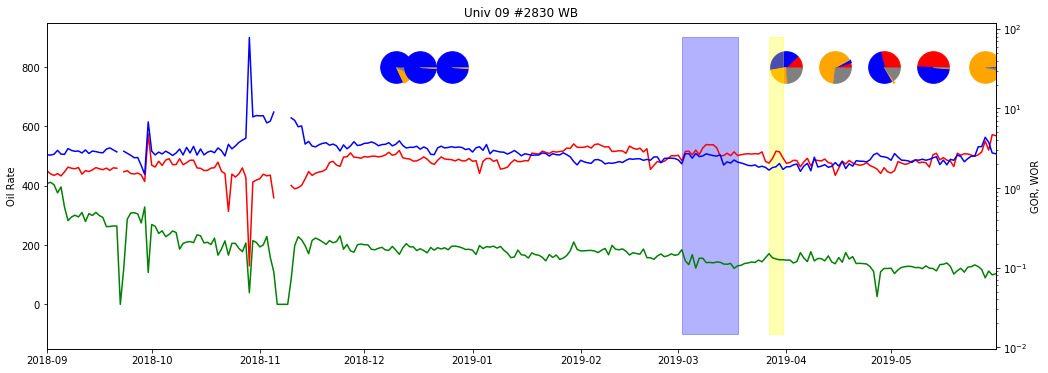

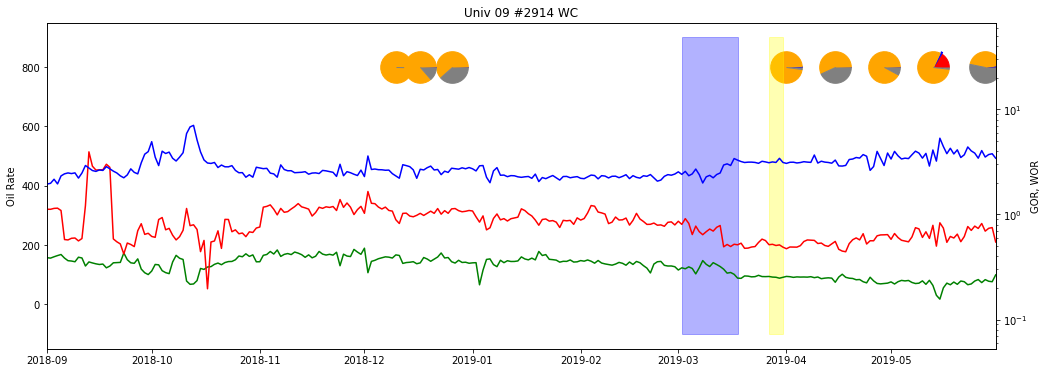

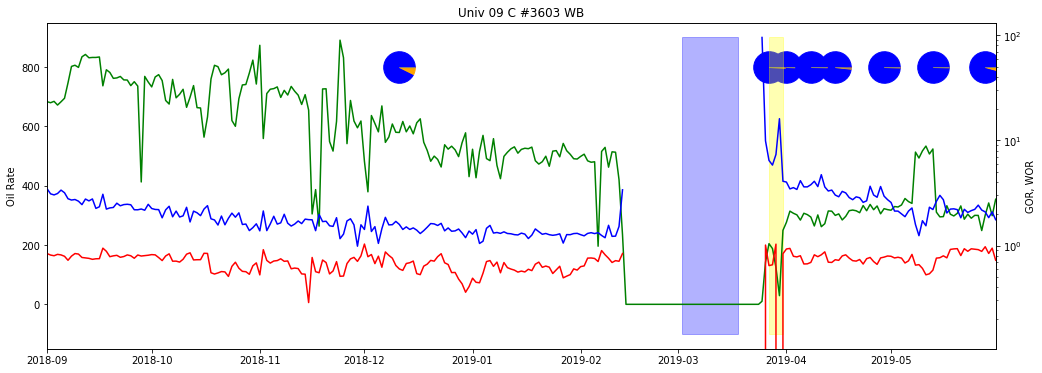

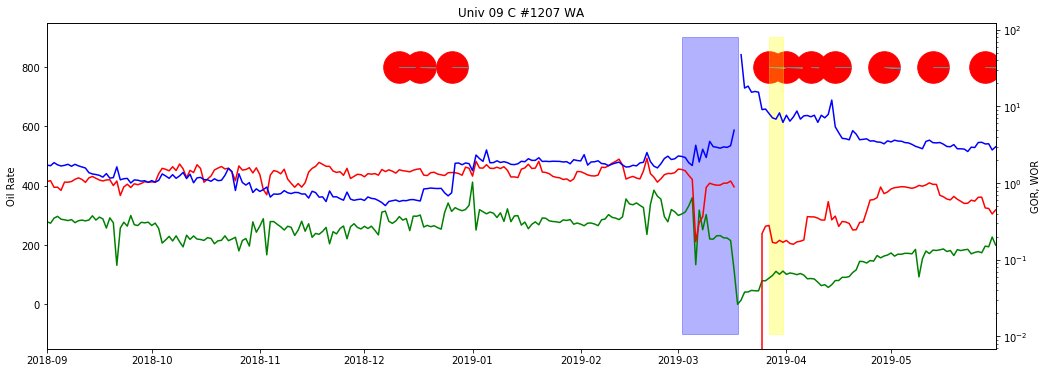

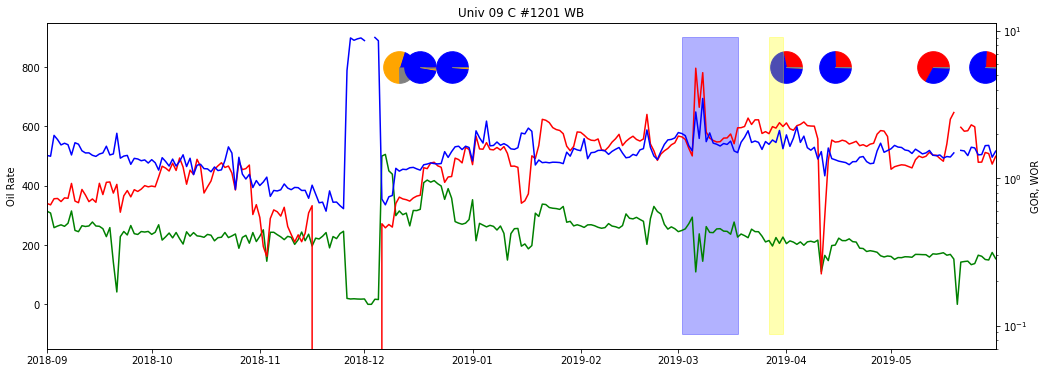

In [19]:
for well in surveillanceWells:
    new = well.replace('.',
                  ' ', 3).replace('university','Univ').replace('09a', '09 A').replace('09b', 
                  '09 B').replace('09c', '09 C').replace('wa', ' WA').replace('wb', ' WB').replace('wc', 
                  ' WC').replace('h', 'H').replace(' 1', ' #1').replace(' 2', ' #2').replace(' 3', ' #3')

    try:
        df = pd.read_excel('../files/BiotaStudy_DailyProd_FieldDirect_thru_2019-0531.xlsx', 
                   sheet_name=new, skiprows=6)
        df = df.iloc[:-4,:]

        df['Date'] =  pd.to_datetime(df['Date'], format='%Y%b%d')

        fig, ax = plt.subplots(1, figsize=(17,6))
        ax.plot(df.Date, df.Oil, c='green', label='Oil Rate')
#         ax.plot(df.Date, df['Tubing Pressure'], c='black', label='Tubing Pressure')
#         ax.plot(df.Date, df['Casing Pressure'], c='brown', label='Casing Pressure')
        ax.set_title(new)
        ax.set_ylabel('Oil Rate')
        #ax.set_ylim(0,1000)
        
        # Create patches that capture the 0-80% y-axis, and 80-100% y-axis
        # to denote higher and lower subsurface signal sections
        width = pd.to_datetime('2019/03/18') - pd.to_datetime('2019/03/02')
        fracing = Rectangle((pd.to_datetime('2019/03/02'), -100), width, 1000, alpha=0.3, color='blue')
        width = pd.to_datetime('2019/03/31') - pd.to_datetime('2019/03/27')
        flowback = Rectangle((pd.to_datetime('2019/03/27'), -100), width, 1000, alpha=0.3, color='yellow')

        # Add patches and annotate
        ax.add_patch(fracing)
        #ax.annotate('Higher Subsurface Signal', (10, 0.85), color='black', size=14)
        ax.add_patch(flowback)
        #ax.annotate('Lower Subsurface Signal', (10, 0.55), color='black', size=14)
        
        ax.set_xlim(pd.to_datetime('2018/09/01'), pd.to_datetime('2019/05/31'))
        
        ax2 = ax.twinx()
        ax2.plot(df.Date, df['Gas']/df['Oil'], c='red', label='GOR')
        ax2.plot(df.Date, df['Water']/df['Oil'], c='blue', label='WOR')
        ax2.set_ylabel('GOR, WOR')
        ax2.set_yscale("log")
        
        for i, r in results.loc[results.wellname==well].iterrows():
            draw_pie(ax,[r['WC A'],r['WC B'],r['WC C'], r['Unknown']], 
                     colors,
                     pd.to_datetime(r.collectiondate), 800,size=1000, alpha=1)

        #ax.legend()
        fig.savefig('../images/production_{}.png'.format(well), dpi=300, bbox_inches='tight')
        ,
    except:
        continue
    


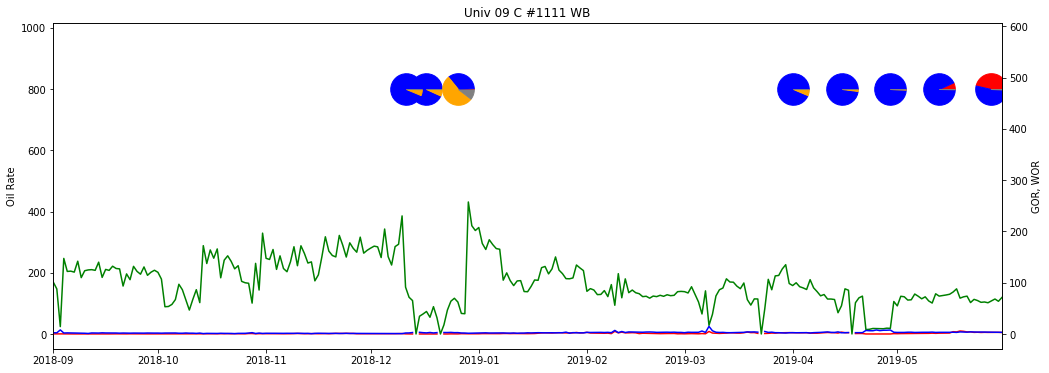

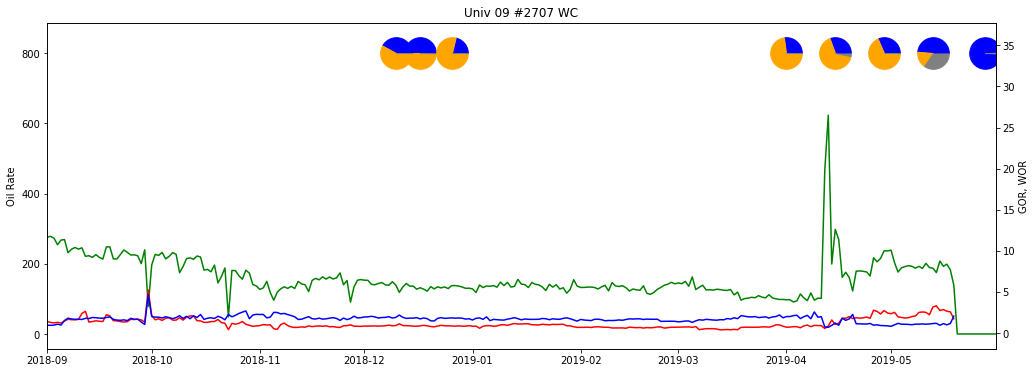

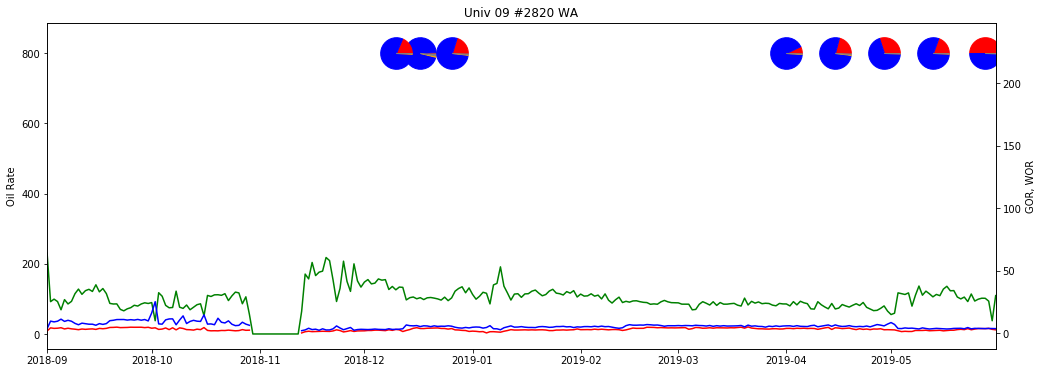

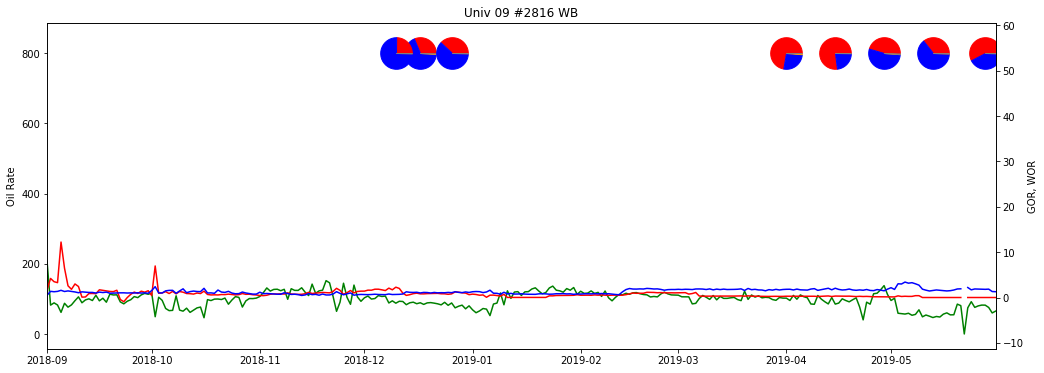

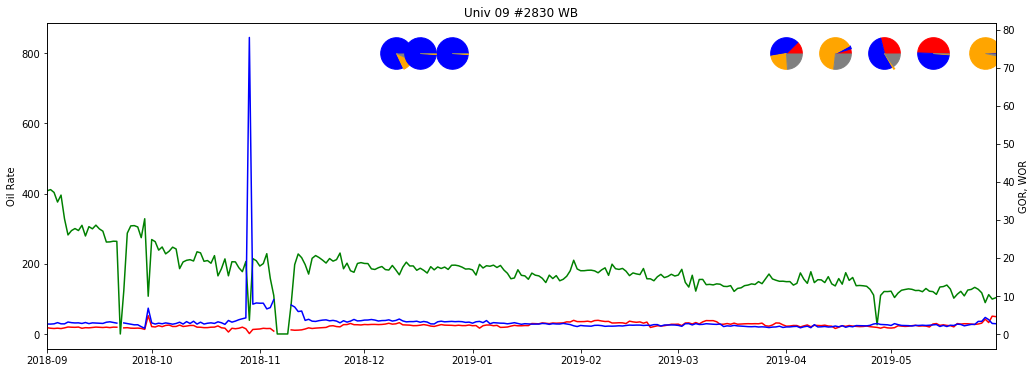

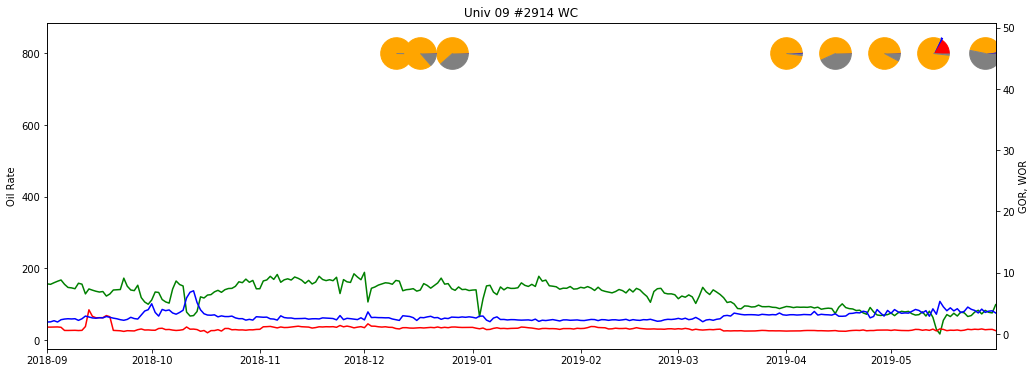

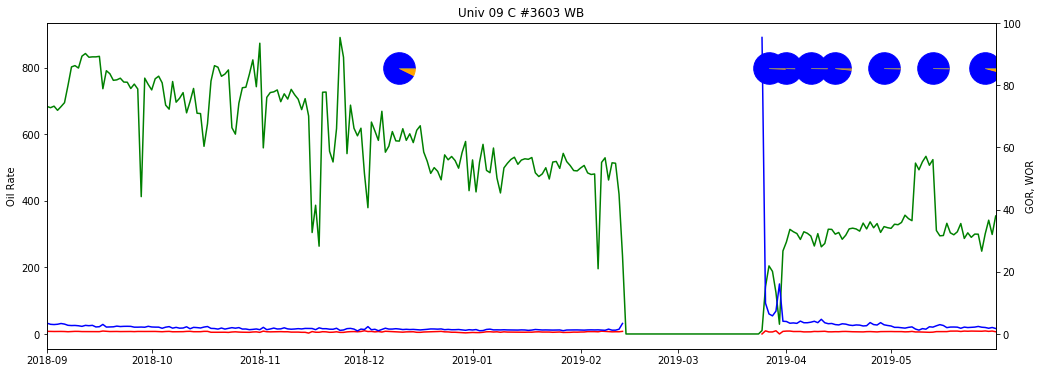

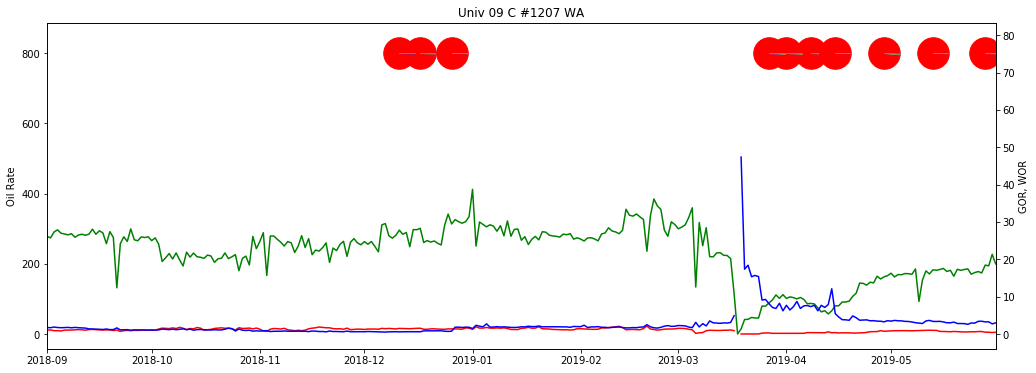

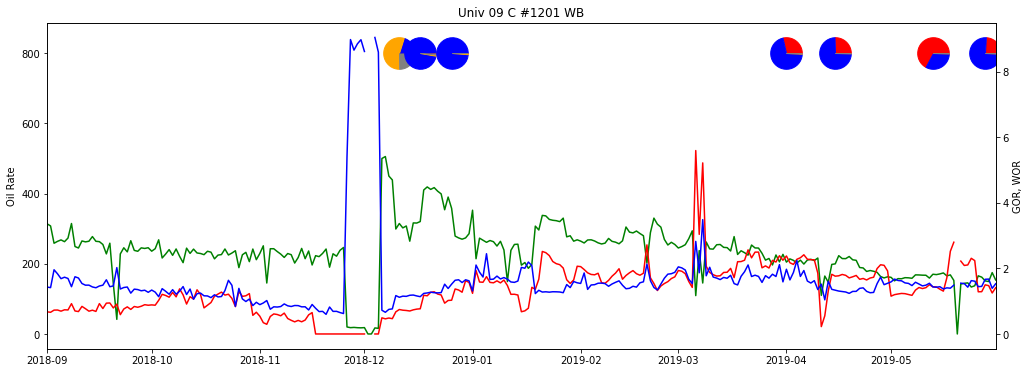

In [29]:
for well in surveillanceWells:
    new = well.replace('.',
                  ' ', 3).replace('university','Univ').replace('09a', '09 A').replace('09b', 
                  '09 B').replace('09c', '09 C').replace('wa', ' WA').replace('wb', ' WB').replace('wc', 
                  ' WC').replace('h', 'H').replace(' 1', ' #1').replace(' 2', ' #2').replace(' 3', ' #3')

    try:
        df = pd.read_excel('../files/BiotaStudy_DailyProd_FieldDirect_thru_2019-0531.xlsx', 
                   sheet_name=new, skiprows=6)
        df = df.iloc[:-4,:]

        df['Date'] =  pd.to_datetime(df['Date'], format='%Y%b%d')

        fig, ax = plt.subplots(1, figsize=(17,6))
        ax.plot(df.Date, df.Oil, c='green', label='Oil Rate')
#         ax.plot(df.Date, df['Tubing Pressure'], c='black', label='Tubing Pressure')
#         ax.plot(df.Date, df['Casing Pressure'], c='brown', label='Casing Pressure')
        ax.set_title(new)
        ax.set_ylabel('Oil Rate')
        #ax.set_ylim(0,1000)
        
        ax.set_xlim(pd.to_datetime('2018/09/01'), pd.to_datetime('2019/05/31'))
        
        ax2 = ax.twinx()
        ax2.plot(df.Date, df['Gas']/df['Oil'], c='red', label='GOR')
        ax2.plot(df.Date, df['Water']/df['Oil'], c='blue', label='WOR')
        ax2.set_ylabel('GOR, WOR')
        #ax2.set_yscale("log")
        
        for i, r in results.loc[results.wellname==well].iterrows():
            draw_pie(ax,[r['WC A'],r['WC B'],r['WC C'], r['Unknown']], 
                     colors,
                     pd.to_datetime(r.collectiondate), 800,size=1000, alpha=1)

        #ax.legend()
        ,
    except:
        continue
    


In [11]:
df2  = pd.DataFrame()
for well in results.wellname.unique():
    new = well.replace('.',
                  ' ', 3).replace('university','Univ').replace('09a', '09 A').replace('09b', 
                  '09 B').replace('09c', '09 C').replace('wa', ' WA').replace('wb', ' WB').replace('wc', 
                  ' WC').replace('h', 'H').replace(' 1', ' #1').replace(' 2', ' #2').replace(' 3', ' #3')

    try:
        df = pd.read_excel('../files/BiotaStudy_DailyProd_FieldDirect_thru_2019-0331_ver2.xlsx', 
                   sheet_name=new, skiprows=6)
        df = df.iloc[:-4,:]

        df['Date'] =  pd.to_datetime(df['Date'], format='%Y%b%d')
        
        df0 = df.iloc[163,:]
        df0['wellname'] = well
        df2 = df2.append(df0)
#         daysonline = df.Date[df.shape[0]-1] - df.Date[0]
#         print(daysonline.days)
    except:
        continue

/home/jovyan/my-conda-envs/qiime2-2018.8/lib/python3.5/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/jovyan/my-conda-envs/qiime2-2018.8/lib/python3.5/site-packages/pandas/core/series.py:769: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc[key] = value


In [12]:
df2.to_csv('../shared/well_summaries2.txt', sep='\t')

In [11]:
df2 = pd.read_csv('../shared/well_summaries.txt', sep='\t')

In [12]:
for well, g in results.groupby('wellname'):
    df2.loc[df2.wellname==well,'Formation']=g.Formation[0]

In [13]:
df2['FormationColor'] = df2.Formation
df2.FormationColor.replace({'WC A': 'red',
                                        'WC B': 'blue',
                                        'WC C': 'orange'}, inplace=True)

In [14]:
df2['WC'] = df2.Water/(df2.Water+df2.Oil)

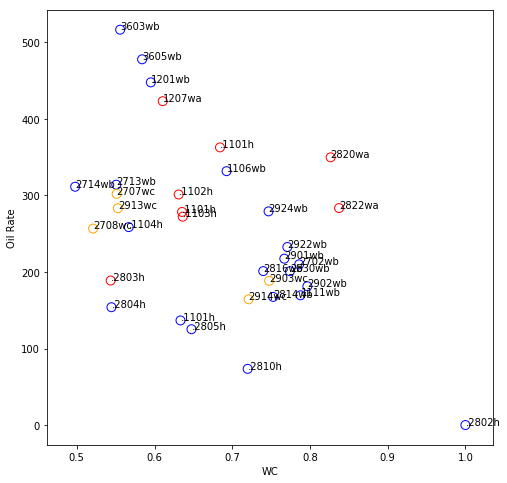

In [17]:
fig, ax = plt.subplots(figsize=(8,8))
for formation, g in df2.groupby('FormationColor'):
    ax.scatter(g.WC, g.Oil, edgecolors=formation, s=80, facecolors='none')
    ax.set_xlabel('WC'), ax.set_ylabel('Oil Rate')
    for i, r in g.iterrows():
        if not(np.isnan(r.WC)):
            ax.annotate(r.wellname[-6:], (r.WC, r.Oil))

In [18]:
df2['WOR'] = df2.Water/(df2.Oil)
df2['GOR'] = df2.Gas/(df2.Oil)

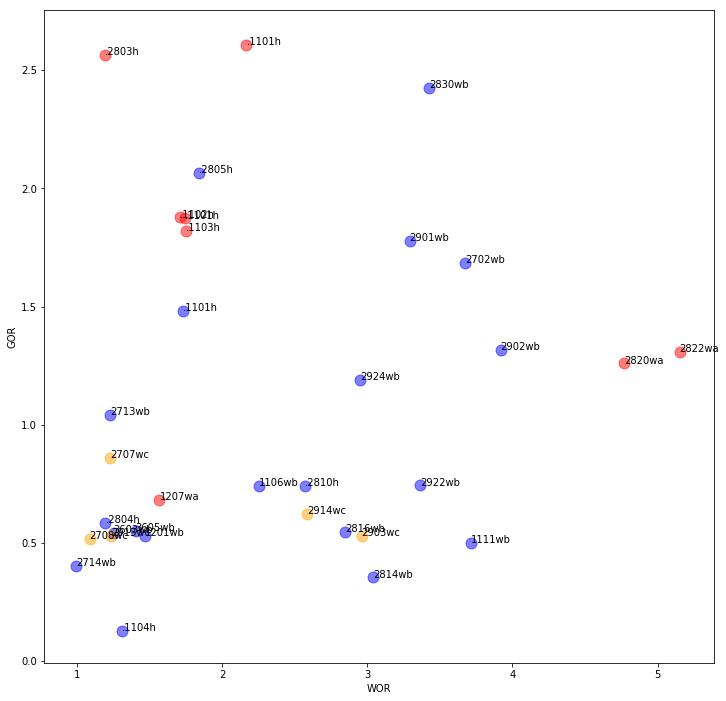

In [25]:
fig, ax = plt.subplots(figsize=(12,12))
for formation, g in df2.groupby('FormationColor'):
    ax.scatter(g.WOR, g.GOR, c=formation, s=120, alpha=0.5)
    ax.set_xlabel('WOR'), ax.set_ylabel('GOR')
    for i, r in g.iterrows():
        if not(r.Oil==0):
            ax.annotate(r.wellname[-6:], (r.WOR, r.GOR))